# Bike Rental Demand Prediction:

##  Import Required Libraries:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline 


## Load the Dataset :

In [2]:
df = pd.read_csv("D:\data science\Project\Bike Rental\Dataset.csv")

## 1. Exploratory Data Analysis (EDA) 

### 1.1 Describe the Dataset :

In [3]:
df.head() 
df.tail() 
df.shape 
df.columns 
df.info() 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


### 1.2 Clean the Data :

In [4]:
# Check Missing Values 
df.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
## Replace Missing Values:
df.replace('?',np.nan,inplace=True)

In [6]:
## Convert Data Types:
num_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)

### 1.3 Handle Missing Values :

In [7]:
df.isna().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [8]:
## Impute missing values:
cat_cols = ['season','yr','mnth','holiday','workingday','weathersit']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
    

In [9]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
hr                     int64
holiday               object
weekday                int64
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                    int64
dtype: object

### 1.4 Duplicate Records :

In [11]:
# Check Duplicate Records :
df.duplicated().sum() 
# Remove Duplicates:
df.drop_duplicates(inplace=True)

### 1.5 Detect Outliers :

####  Boxplot for Numerical Columns :


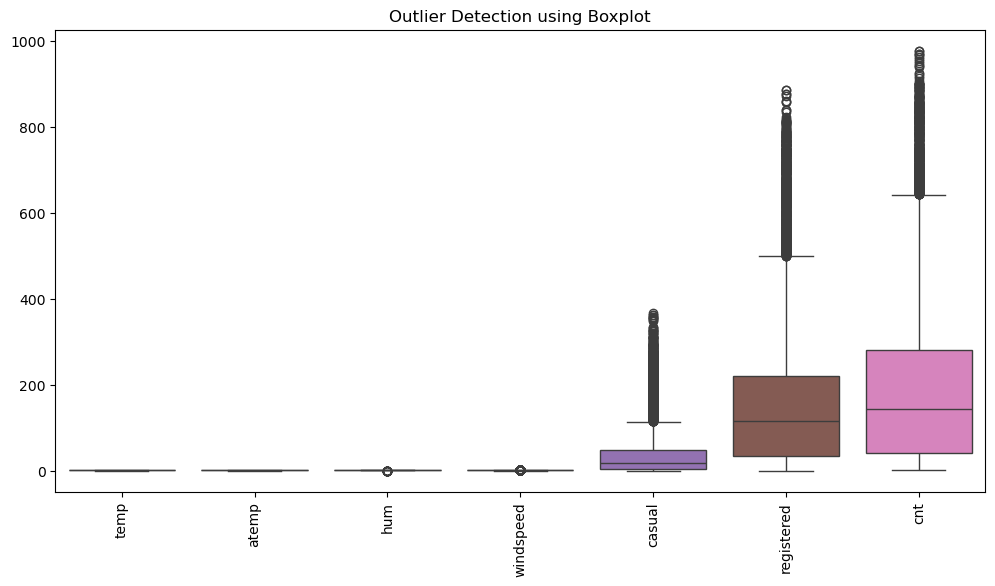

In [12]:
plt.figure(figsize=(12,6)) 
sns.boxplot(data=df[num_cols]) 
plt.xticks(rotation=90) 
plt.title("Outlier Detection using Boxplot") 
plt.show() 

#### IQR Method for Outliers :

In [13]:
Q1 = df[num_cols].quantile(0.25) 
Q3 = df[num_cols].quantile(0.75) 
IQR = Q3 - Q1 
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |  
(df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## 2. Data Visualization :

### 2.1 Scatter Plot :

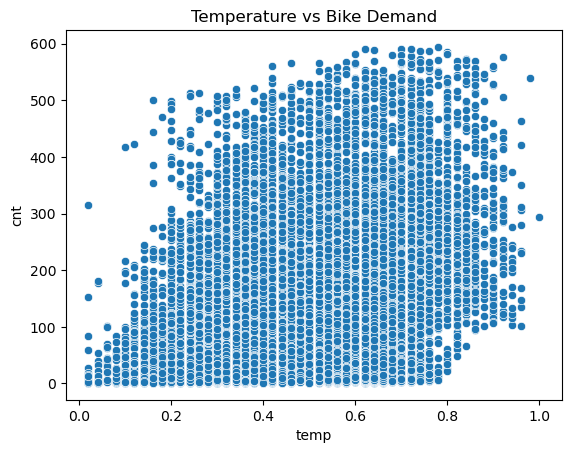

In [14]:
sns.scatterplot(x='temp', y='cnt', data=df) 
plt.title("Temperature vs Bike Demand") 
plt.show() 

### 2.2 Line Plot (Time Series) :

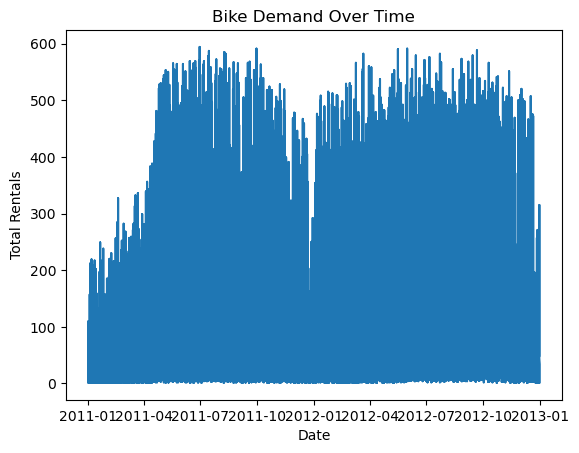

In [15]:
plt.figure()
plt.plot(df['dteday'], df['cnt'])
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.title('Bike Demand Over Time')
plt.show()

### 2.3 Bar Plot :

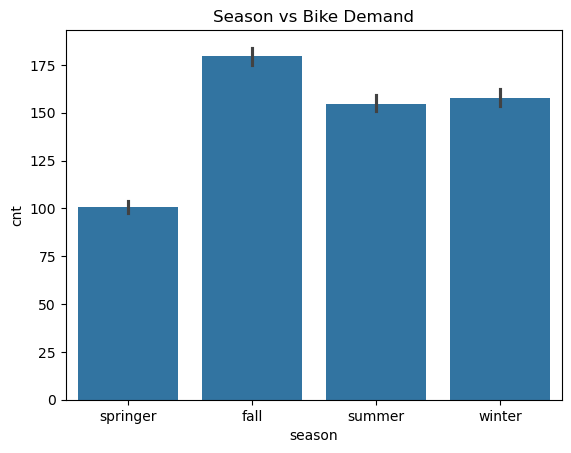

In [16]:
sns.barplot(x='season', y='cnt', data=df) 
plt.title("Season vs Bike Demand") 
plt.show()

### 2.4 Histogram :

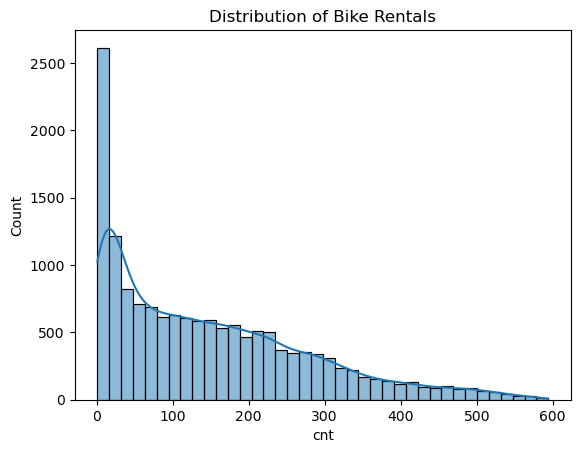

In [17]:
sns.histplot(df['cnt'], kde=True) 
plt.title("Distribution of Bike Rentals") 
plt.show() 

### 2.5 Heatmap / Correlation Matrix:

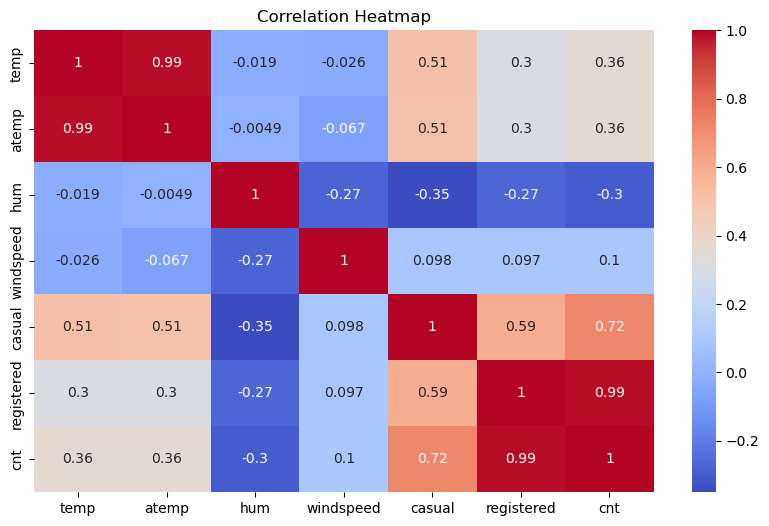

In [18]:
plt.figure(figsize=(10,6)) 
corr = df[num_cols].corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.title("Correlation Heatmap") 
plt.show() 

### 2.6 Seasonality & Demand Analysis :


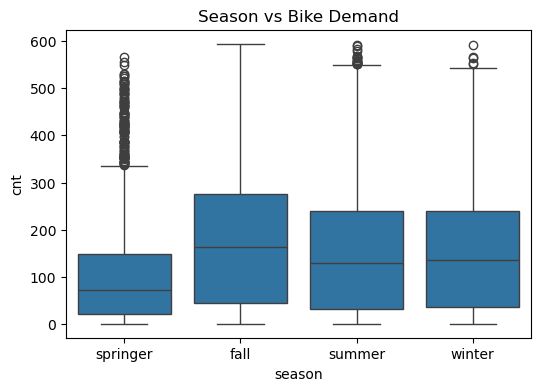

In [19]:
plt.figure(figsize=(6,4)) 
sns.boxplot(x='season', y='cnt', data=df) 
plt.title("Season vs Bike Demand") 
plt.show() 

### 2.6  Weather Impact on Demand :

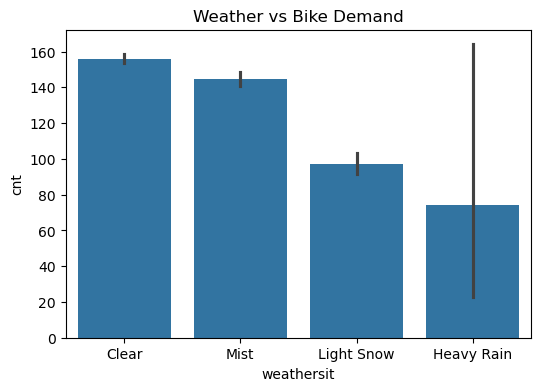

In [20]:
plt.figure(figsize=(6,4)) 
sns.barplot(x='weathersit', y='cnt', data=df) 
plt.title("Weather vs Bike Demand") 
plt.show() 

### 2.7  Holiday Impact :

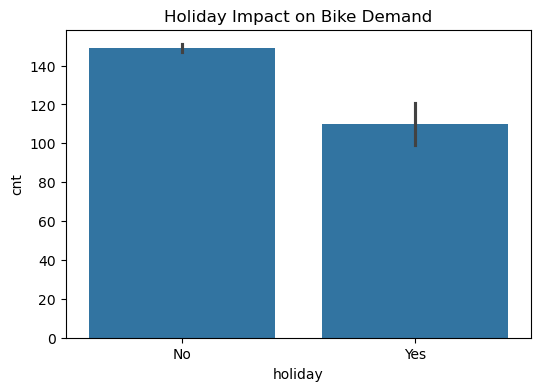

In [21]:
plt.figure(figsize=(6,4)) 
sns.barplot(x='holiday', y='cnt', data=df) 
plt.title("Holiday Impact on Bike Demand") 
plt.show()

In [22]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0,3.0,13.0,16
1,2,2011-01-01,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0,8.0,32.0,40
2,3,2011-01-01,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0,5.0,27.0,32
3,4,2011-01-01,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0,3.0,10.0,13
4,5,2011-01-01,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0,0.0,1.0,1


## 3. Feature Engineering:

### 3.1 Generating New Features from Existing Ones

 Extract time-based features from date


In [23]:
df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day
df['dayofweek'] = df['dteday'].dt.dayofweek


These features help capture seasonality, trends, and weekly patterns.

### 3.2 Handling Categorical Variables (Encoding)
#### One-Hot Encoding:

In [24]:
df = pd.get_dummies(
    df,
    columns=['season','yr','mnth','holiday','workingday','weathersit'],
    drop_first=True
)


Prevents ordinal bias and improves regression performance.

### 3.3 Scaling / Normalizing Numerical Features:

#### Standard Scaling:

In [25]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['temp','atemp','hum','windspeed']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [30]:
import joblib

joblib.dump(scaler, "scaler.pkl")
print("Scaler saved successfully")

Scaler saved successfully


### 3.4 Incorporating Domain Knowledge :

#### Peak Hour Feature

In [26]:
df['is_peak_hour'] = df['hr'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)

## 4. Model Building

### 4.1 Define Features & Target:

In [27]:
X = df.drop(['cnt','casual','registered','dteday','instant'], axis=1)
y = df['cnt']


In [28]:
print(X.columns)

Index(['hr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'year', 'month',
       'day', 'dayofweek', 'season_springer', 'season_summer', 'season_winter',
       'yr_2012', 'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'holiday_Yes', 'workingday_Working Day', 'weathersit_Heavy Rain',
       'weathersit_Light Snow', 'weathersit_Mist', 'is_peak_hour'],
      dtype='object')


In [31]:
feature_columns = X.columns
joblib.dump(feature_columns, "feature_columns.pkl")
print("Feature columns saved")

Feature columns saved


### 4.2 Train-Test Split:

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 4.3 Train Models:

#### Linear Regression:

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

#### Random Forest Regressor:

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

#### Gradient Boosting Regressor:

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

### 4.4 Model Evaluation:

#### Metrics Used:

RMSE

MAE

R-Squared


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(model):
    preds = model.predict(X_test)
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("MAE:", mean_absolute_error(y_test, preds))
    print("R2:", r2_score(y_test, preds))

evaluate(lr)
evaluate(dt)
evaluate(rf)
evaluate(gbr)


RMSE: 81.8682061876995
MAE: 63.68148562547324
R2: 0.5946423061753636
RMSE: 47.98034285509651
MAE: 28.429228243021345
R2: 0.8607694415364533
RMSE: 33.535061437972715
MAE: 20.90870607553366
R2: 0.9319847836596714
RMSE: 48.577742981747015
MAE: 34.217872639941284
R2: 0.8572807559639702


## 5. Hyperparameter Tuning:

### 5.1 Grid Search for Random Forest:

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200],
    'max_depth':[None,10,20]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2'
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
evaluate(best_rf)


RMSE: 33.49258498286082
MAE: 20.900394088669948
R2: 0.9321569745242092


### 5.2 Cross-Validation Performance:

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
scores.mean()


np.float64(0.9239339413784373)

### 5.3 Overfitting vs Underfitting Control

#### Steps Taken:

Limited tree depth

Cross-validation

Regularization through ensemble models


## 6. Model Evaluation 
### Explanation 
Model evaluation is the process of measuring how well a trained model performs on unseen 
data. 
Since this is a regression problem, we use regression-specific metrics.

### 6.1 Evaluation Metrics for Regression Models :

#### Metrics Used 
MAE (Mean Absolute Error) 
→ Average absolute difference between actual and predicted values.

MSE (Mean Squared Error) 
→ Penalizes large errors more heavily 

RMSE (Root Mean Squared Error) 
→ Same unit as target variable, easier to interpret 

R² (R-Squared)
→ Proportion of variance explained by the model

#### Evaluate Models Using All Metrics:

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import numpy as np 
 
def evaluate_model(name, model): 
    preds = model.predict(X_test) 
    mae = mean_absolute_error(y_test, preds) 
    mse = mean_squared_error(y_test, preds) 
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, preds) 
     
    return [name, mae, mse, rmse, r2]

### 6.2 Compare Performance of Different Models 
 
#### Create Comparison Table

In [41]:
results = [] 
 
results.append(evaluate_model("Linear Regression", lr)) 
results.append(evaluate_model("Decision Tree", dt)) 
results.append(evaluate_model("Random Forest", rf)) 
results.append(evaluate_model("Gradient Boosting", gbr)) 
 
results_df = pd.DataFrame( 
    results, 
    columns=["Model", "MAE", "MSE", "RMSE", "R2"] 
) 
 
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,63.681486,6702.403184,81.868206,0.594642
1,Decision Tree,28.429228,2302.113300,47.980343,0.860769
2,Random Forest,20.880079,1109.303459,33.306208,0.932910
3,Gradient Boosting,34.217873,2359.797113,48.577743,0.857281


#### Interpretation:
Among all evaluated models, ensemble models such as Random Forest and Gradient 
Boosting achieved better performance with lower RMSE and higher R² values. These models 
were more effective in capturing complex non-linear patterns in bike rental demand.

### 6.3 Select the Best Model:

In [42]:
results_df.sort_values(by="R2", ascending=False)

,Model,MAE,MSE,RMSE,R2
2,Random Forest,20.880079,1109.303459,33.306208,0.932910
1,Decision Tree,28.429228,2302.113300,47.980343,0.860769
3,Gradient Boosting,34.217873,2359.797113,48.577743,0.857281
0,Linear Regression,63.681486,6702.403184,81.868206,0.594642


#### Best Model Selection Criteria: 
Highest R² 

Lowest RMSE 

Stable performance 

Best model selected: Random Forest / Gradient Boosting (based on results)

## 7. Model Deployment :
#### Explanation :
Model deployment is the process of making a trained machine learning model available for 
real-world usage so it can generate predictions on new data.

### 7.1 Save the Best Mode:

In [43]:
import joblib 
joblib.dump(best_rf, "bike_demand_model.pkl") 

['bike_demand_model.pkl']

### 7.2 Load the Model for Prediction :

In [44]:
loaded_model = joblib.load("bike_demand_model.pkl") 

### 7.3 Make Predictions on New Data :

In [45]:
sample_input = X_test.iloc[0:1] 
prediction = loaded_model.predict(sample_input) 
prediction 

array([244.275])

The model successfully predicts bike rental demand for unseen inputs.

### 7.4 Production Deployment (Conceptual) 

#### Deployment Strategy :
The trained model can be deployed using: 

Flask or FastAPI (REST API) 

Cloud platforms (AWS, Azure, GCP) 

Users send input features through an API 

The model returns predicted bike demand

### 7.5 Monitoring & Model Updates 

#### Monitoring Includes: 

Tracking prediction errors over time 

Detecting data drift 

Periodic retraining with new data 

This ensures long-term model reliability.

## Final Project Conclusion:

This project successfully developed a machine learning solution to predict bike rental demand. 
Through comprehensive exploratory data analysis, feature engineering, model building, 
hyperparameter tuning, and evaluation, the final model demonstrated strong predictive 
performance. The selected model was deployed for real-world usage, making the solution 
practical and scalable.